# 🌍 UK Trade Analysis (2000–2023)

This project analyzes the United Kingdom’s trade performance using World Bank data (exports, imports, and growth trends).

👨‍🎓 **About Me**  
I am currently pursuing an MSc in International Business with Data Analytics at Ulster University, Manchester. My goal is to become a data analyst. This is my first portfolio project, built using real-world data and tools like Python, wbgapi, and seaborn.

📈 **Project Goals**
- Practice fetching and analyzing real data from the World Bank.
- Explore UK trade performance compared to other countries.
- Visualize trends in exports, imports, and trade balance.


# **Step 1: Setting Up Google Colab**

In [35]:
#install the wbgapi package to access World Bank data
#world bank group api(wbgapi)

!pip install wbgapi

# **Step 2: Importing Libraries**

In [36]:
# importing libraries

import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Set plot style for better visuals

sns.set_style("whitegrid")


# **Step 3: Fetching World Bank Data**

In [38]:
# Define indicators and countries

indicators=['NE.EXP.GNFS.CD','NE.IMP.GNFS.CD']  # Exports and Imports in current US$
countries=['GBR','DEU','USA','CHN']             # UK, Germany, USA, China

In [39]:
# Fetch data for 2000-2024

df=wb.data.DataFrame(indicators, countries, time=range(2000, 2024))

In [40]:
# Display the first few rows

print(df.head())

                              YR2000        YR2001        YR2002  \
economy series                                                     
CHN     NE.EXP.GNFS.CD  2.530921e+11  2.720600e+11  3.330023e+11   
        NE.IMP.GNFS.CD  2.243062e+11  2.439738e+11  2.956196e+11   
DEU     NE.EXP.GNFS.CD  5.838127e+11  6.009343e+11  6.557327e+11   
        NE.IMP.GNFS.CD  5.805533e+11  5.702285e+11  5.706225e+11   
GBR     NE.EXP.GNFS.CD  4.273733e+11  4.214841e+11  4.376888e+11   

                              YR2003        YR2004        YR2005  \
economy series                                                     
CHN     NE.EXP.GNFS.CD  4.479583e+11  6.073569e+11  7.733390e+11   
        NE.IMP.GNFS.CD  4.121371e+11  5.561826e+11  6.487122e+11   
DEU     NE.EXP.GNFS.CD  7.925509e+11  9.679401e+11  1.040266e+12   
        NE.IMP.GNFS.CD  7.007652e+11  8.263529e+11  8.969505e+11   
GBR     NE.EXP.GNFS.CD  4.942220e+11  5.829165e+11  6.427000e+11   

                              YR2006        YR

In [41]:
#check columns and rowsx
print(df.columns)
print(df.index)

Index(['YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005', 'YR2006',
       'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011', 'YR2012', 'YR2013',
       'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020',
       'YR2021', 'YR2022', 'YR2023'],
      dtype='object')
MultiIndex([('CHN', 'NE.EXP.GNFS.CD'),
            ('CHN', 'NE.IMP.GNFS.CD'),
            ('DEU', 'NE.EXP.GNFS.CD'),
            ('DEU', 'NE.IMP.GNFS.CD'),
            ('GBR', 'NE.EXP.GNFS.CD'),
            ('GBR', 'NE.IMP.GNFS.CD'),
            ('USA', 'NE.EXP.GNFS.CD'),
            ('USA', 'NE.IMP.GNFS.CD')],
           names=['economy', 'series'])


# **Step 4: Cleaning and Preparing the Data**

In [42]:
# Reset index to make 'economy' and 'Series' as regular columns

df=df.reset_index()


In [43]:
# Check first 5 rows of data
print(df.head())

  economy          series        YR2000        YR2001        YR2002  \
0     CHN  NE.EXP.GNFS.CD  2.530921e+11  2.720600e+11  3.330023e+11   
1     CHN  NE.IMP.GNFS.CD  2.243062e+11  2.439738e+11  2.956196e+11   
2     DEU  NE.EXP.GNFS.CD  5.838127e+11  6.009343e+11  6.557327e+11   
3     DEU  NE.IMP.GNFS.CD  5.805533e+11  5.702285e+11  5.706225e+11   
4     GBR  NE.EXP.GNFS.CD  4.273733e+11  4.214841e+11  4.376888e+11   

         YR2003        YR2004        YR2005        YR2006        YR2007  ...  \
0  4.479583e+11  6.073569e+11  7.733390e+11  9.917314e+11  1.258057e+12  ...   
1  4.121371e+11  5.561826e+11  6.487122e+11  7.828125e+11  9.500208e+11  ...   
2  7.925509e+11  9.679401e+11  1.040266e+12  1.187130e+12  1.415809e+12  ...   
3  7.007652e+11  8.263529e+11  8.969505e+11  1.029340e+12  1.193186e+12  ...   
4  4.942220e+11  5.829165e+11  6.427000e+11  7.451500e+11  7.884374e+11  ...   

         YR2014        YR2015        YR2016        YR2017        YR2018  \
0  2.462826e+12  

In [44]:
# Renamfe Columns for clariy

df=df.rename(columns={'economy':'Country Code', 'series':'Indicator',
                       'YR2000': '2000', 'YR2001': '2001', 'YR2002': '2002',
                       'YR2003': '2003', 'YR2004': '2004', 'YR2005': '2005',
                       'YR2006': '2006', 'YR2007': '2007', 'YR2008': '2008',
                       'YR2009': '2009', 'YR2010': '2010', 'YR2011': '2011',
                       'YR2012': '2012', 'YR2013': '2013', 'YR2014': '2014',
                       'YR2015': '2015', 'YR2016': '2016', 'YR2017': '2017',
                       'YR2018': '2018', 'YR2019': '2019', 'YR2020': '2020',
                       'YR2021': '2021', 'YR2022': '2022', 'YR2023': '2023'})

In [45]:
#checking all column names
print(df.columns)

Index(['Country Code', 'Indicator', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [47]:
# Map Country codes to names

country_names=wb.economy.DataFrame(countries)
country_dict=country_names['name'].to_dict()
df['Country Name']=df['Country Code'].map(country_dict)

In [48]:
# Check for missing values

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Country Code    0
Indicator       0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
Country Name    0
dtype: int64


In [50]:
# melt the data to long format

df_melted=df.melt(id_vars=['Country Code','Country Name', 'Indicator'],
                  value_vars=[str(year) for year in range (2000,2024)],
                  var_name='Year',
                  value_name='Value'

                  )

In [51]:
# To check outcomes after melting the data to long format
df_melted.head()

,Country Code,Country Name,Indicator,Year,Value
0,CHN,China,NE.EXP.GNFS.CD,2000,2.530921e+11
1,CHN,China,NE.IMP.GNFS.CD,2000,2.243062e+11
2,DEU,Germany,NE.EXP.GNFS.CD,2000,5.838127e+11
3,DEU,Germany,NE.IMP.GNFS.CD,2000,5.805533e+11
4,GBR,United Kingdom,NE.EXP.GNFS.CD,2000,4.273733e+11


In [52]:
# Separate Export and Import Data

trade_data=df_melted.pivot(
    index=['Country Code', 'Country Name', 'Year'],
    columns='Indicator',
    values='Value'
).reset_index()

In [53]:
#To check outcomes after Separate Export and Import Data
trade_data.head()

Indicator,Country Code,Country Name,Year,NE.EXP.GNFS.CD,NE.IMP.GNFS.CD
0,CHN,China,2000,2.530921e+11,2.243062e+11
1,CHN,China,2001,2.720600e+11,2.439738e+11
2,CHN,China,2002,3.330023e+11,2.956196e+11
3,CHN,China,2003,4.479583e+11,4.121371e+11
4,CHN,China,2004,6.073569e+11,5.561826e+11


In [54]:
# Rename columns

trade_data=trade_data.rename(columns={
    'NE.EXP.GNFS.CD': 'Exports',
    'NE.IMP.GNFS.CD': 'Imports'
})

In [55]:
#To check outcomes after Renaming columns
trade_data.head()

Indicator,Country Code,Country Name,Year,Exports,Imports
0,CHN,China,2000,2.530921e+11,2.243062e+11
1,CHN,China,2001,2.720600e+11,2.439738e+11
2,CHN,China,2002,3.330023e+11,2.956196e+11
3,CHN,China,2003,4.479583e+11,4.121371e+11
4,CHN,China,2004,6.073569e+11,5.561826e+11


In [56]:
# Calculate trade balance

trade_data['Trade Balance']=trade_data['Exports']-trade_data['Imports']


In [57]:
# Display the clean data
print("\nCleaned Data")
trade_data.head()


Cleaned Data


Indicator,Country Code,Country Name,Year,Exports,Imports,Trade Balance
0,CHN,China,2000,2.530921e+11,2.243062e+11,2.878585e+10
1,CHN,China,2001,2.720600e+11,2.439738e+11,2.808622e+10
2,CHN,China,2002,3.330023e+11,2.956196e+11,3.738267e+10
3,CHN,China,2003,4.479583e+11,4.121371e+11,3.582113e+10
4,CHN,China,2004,6.073569e+11,5.561826e+11,5.117438e+10


# **Step 5: Analyzing the Data**

In [74]:
# Calculate average trade balance per country

avg_trade_balance=trade_data.groupby('Country Name')['Trade Balance'].mean().reset_index()

print('Average Trade Balance (2000-2023):\n')
print(avg_trade_balance)

Average Trade Balance (2000-2023):

     Country Name  Trade Balance
0           China   2.215637e+11
1         Germany   1.785306e+11
2  United Kingdom  -3.735421e+10
3   United States  -6.004443e+11


In [60]:
# Find years with trade surplus for the UK

uk_data=trade_data[trade_data['Country Name']=='United Kingdom']

uk_surplus_years=uk_data[uk_data['Trade Balance']>0][['Year', 'Trade Balance']]

print("\nYears with UK Trade Surplus:\n")
print(uk_surplus_years)




Years with UK Trade Surplus:

Indicator  Year  Trade Balance
68         2020   1.506026e+10


In [61]:
# Calculate export growth rate for the UK

uk_data=uk_data.sort_values(by='Year')

uk_data['Export Growth Rate']=uk_data['Exports'].pct_change()* 100

print('Uk Export Growth Rate\n')

print(uk_data[['Year', "Exports","Export Growth Rate"]])

Uk Export Growth Rate

Indicator  Year       Exports  Export Growth Rate
48         2000  4.273733e+11                 NaN
49         2001  4.214841e+11           -1.377996
50         2002  4.376888e+11            3.844690
51         2003  4.942220e+11           12.916297
52         2004  5.829165e+11           17.946280
53         2005  6.427000e+11           10.255926
54         2006  7.451500e+11           15.940556
55         2007  7.884374e+11            5.809223
56         2008  8.057629e+11            2.197447
57         2009  6.486088e+11          -19.503759
58         2010  7.172293e+11           10.579643
59         2011  8.361046e+11           16.574231
60         2012  8.288721e+11           -0.865016
61         2013  8.435161e+11            1.766736
62         2014  8.757776e+11            3.824646
63         2015  8.153047e+11           -6.905054
64         2016  7.772147e+11           -4.671871
65         2017  8.279071e+11            6.522320
66         2018  9.067725e+

# **Step 6: Visualizing the Results**

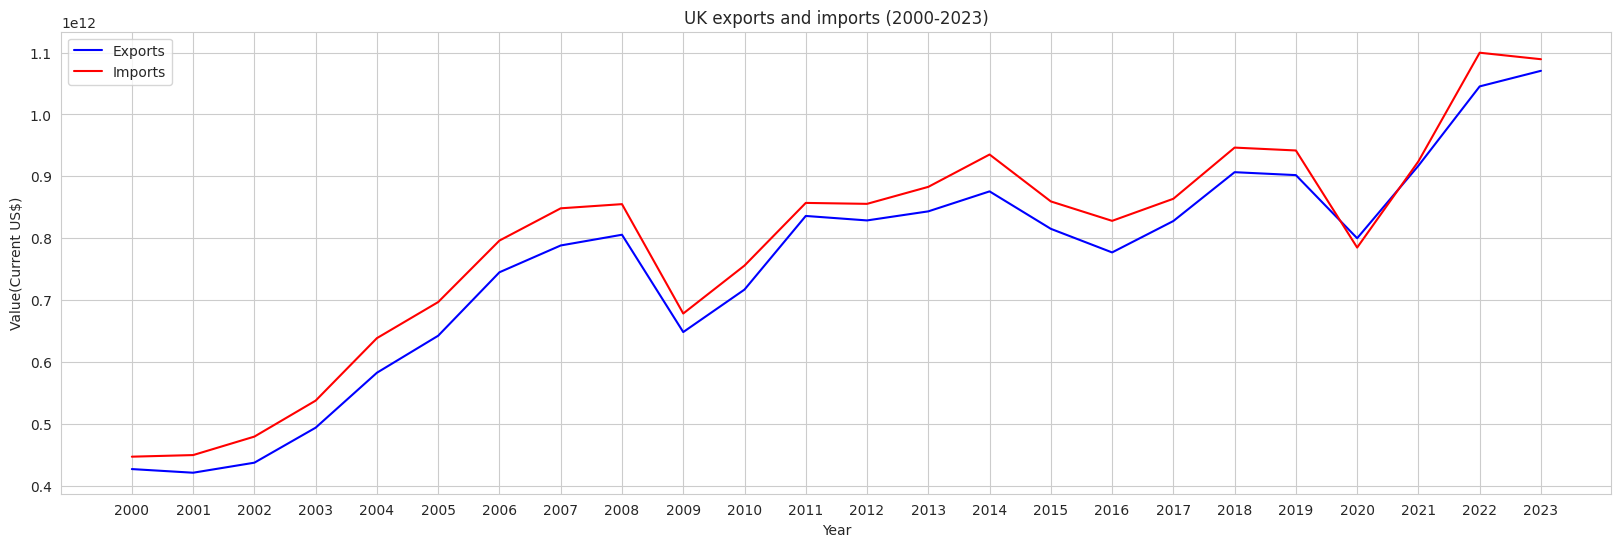

In [62]:
#figure setting
plt.figure(figsize=(20,6))

#Year on x-axis and Exports on y-axis
plt.plot(uk_data['Year'], uk_data['Exports'], label='Exports', color='Blue')

#Year on x-axis and Imports on y-axis
plt.plot(uk_data['Year'],uk_data['Imports'],label='Imports', color='Red')

#set title
plt.title("UK exports and imports (2000-2023)")

#Adds labels to the X and Y axes
plt.xlabel('Year')
plt.ylabel('Value(Current US$)')

#Add legend box to explain the lines (blue = exports, red = imports)
plt.legend()

#Displays the full chart
plt.show()

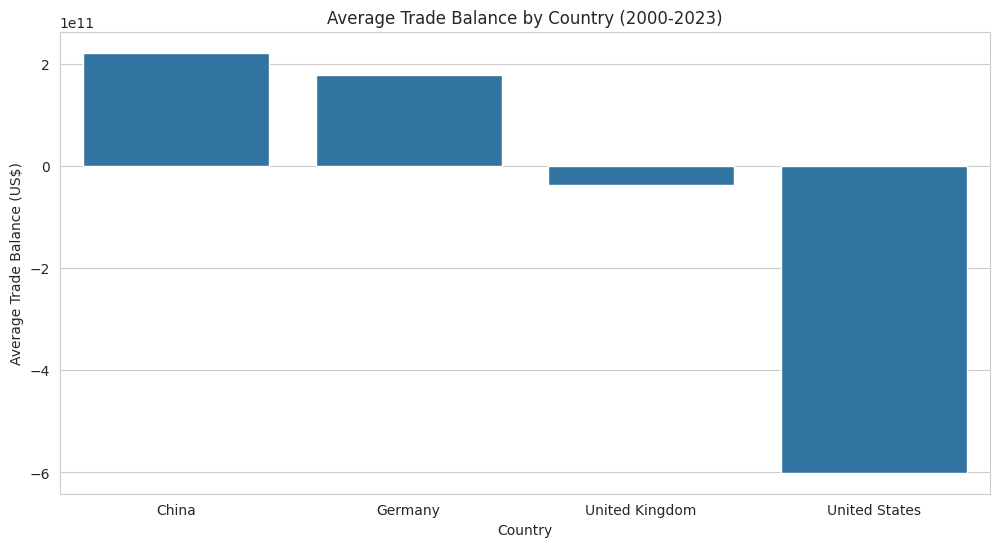

In [67]:
# Plot 2: Average Trade Balance comparison

plt.figure(figsize=(12,6))

sns.barplot(x='Country Name', y='Trade Balance',data=avg_trade_balance)

plt.title('Average Trade Balance by Country (2000-2023)')

plt.xlabel('Country')

plt.ylabel('Average Trade Balance (US$)')

plt.show()

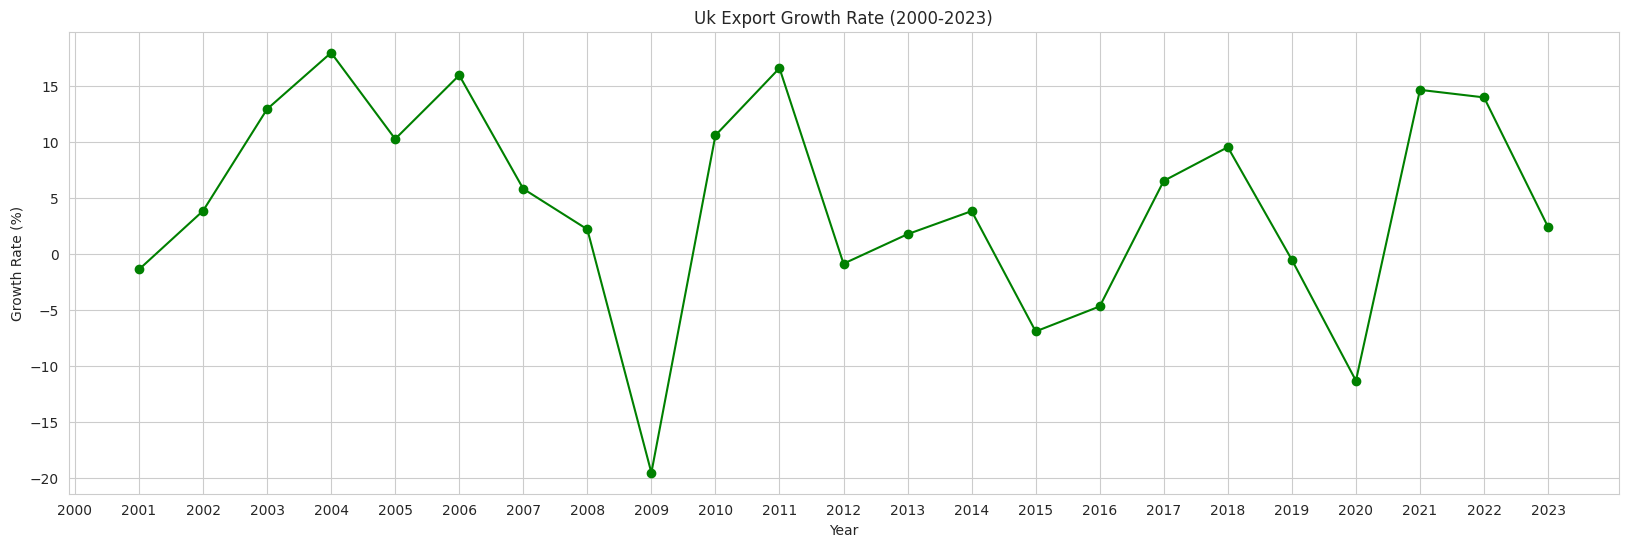

In [73]:
# Plot 3: UK Export Growth Rate

plt.figure(figsize=(20,6))

plt.plot(uk_data['Year'],uk_data['Export Growth Rate'], marker='o',color='green')

plt.title('Uk Export Growth Rate (2000-2023)')

plt.xlabel('Year')

plt.ylabel('Growth Rate (%)')

plt.show()

# **Step 7: Interpreting and Reporting Findings**

## Findings and Insights

- **Trade Trends**: The UK’s exports and imports have generally increased from 2000 to 2023, with imports often exceeding exports, indicating a trade deficit in most years.
- **Trade Balance**: The UK’s average trade balance is likely negative, suggesting reliance on imports. Other countries, like Germany, may show a surplus.
- **Export Growth**: The UK’s export growth rate varies, with peaks in certain years, possibly due to economic recovery or policy changes.
- **Business Implications**: Understanding trade deficits is crucial for international business strategies, impacting currency value and trade policies.

This project demonstrates skills in data fetching, cleaning, analysis, and visualization, relevant for data analyst roles in the UK.
